In [2]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [3]:
nashhub=pd.read_csv('../data/hubNashville__311__Service_Requests.csv')

C:\Users\admir\anaconda3\envs\geospatial\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
nashhub.loc[(nashhub['Status']=='Closed')].head(50)

,Request #,Status,Request Type,Subrequest Type,Additional Subrequest Type,Date / Time Opened,Date / Time Closed,Request Origin,System of Origin ID,Contact Type,...,State Issue,Parent Request,Closed When Created,Address,City,Council District,ZIP,Latitude,Longitude,Mapped Location
0,113016,Closed,"Trash, Recycling & Litter",Cart Service,Trash - Request an Additional Cart,10/30/2018 01:47:00 PM,03/05/2019 09:35:00 PM,Phone,NaN,NaN,...,False,NaN,False,2009 Upland Dr,NASHVILLE,7.0,37216,36.198638,-86.706659,"(36.1986378, -86.7066586)"
1,126185,Closed,"Streets, Roads & Sidewalks",Blocking the Right of Way,NaN,12/28/2018 01:04:00 PM,12/28/2018 01:04:00 PM,Phone,OE-00040610_12/27/2018 15:44,NaN,...,False,NaN,True,ELM HILL PKE / DONELSON PKE,NASHVILLE,15.0,37214,36.148809,-86.666282,"(36.14880891, -86.6662816)"
2,119344,Closed,"Trash, Recycling & Litter",Damage to Property,Trash Service,11/27/2018 02:20:00 PM,11/29/2018 04:04:00 AM,Phone,NaN,NaN,...,False,NaN,True,"597 Westchester Dr, Nashville, TN 37115, Unite...",MADISON,8.0,37115,36.263020,-86.738630,"(36.26302, -86.73863)"
3,127752,Closed,"Trash, Recycling & Litter",New Service/Activate Service,New Construction Residential Recycle,01/03/2019 06:57:00 PM,01/09/2019 10:09:00 AM,Phone,NaN,NaN,...,False,NaN,False,Ruffian Way,NaN,NaN,NaN,38.097609,-84.554097,"(38.0976091, -84.5540971)"
4,113477,Closed,"Trash, Recycling & Litter",Backdoor Trash or Recycle Waivers,Request Recycling Disability Waiver,10/31/2018 12:20:00 PM,10/31/2018 04:10:00 PM,Phone,NaN,NaN,...,False,NaN,True,"2326 Smith Springs Rd, Nashville, TN 37217, Un...",NASHVILLE,29.0,37217,36.096460,-86.637440,"(36.09646, -86.63744)"
5,127499,Closed,"Streets, Roads & Sidewalks",Request New Signal,NaN,01/03/2019 07:39:00 AM,01/22/2019 09:01:00 PM,hubNashville Community,NaN,NaN,...,False,NaN,False,Blue Hole Rd & Antioch Pike,ANTIOCH,32.0,37013,36.059970,-86.672119,"(36.05997021, -86.6721194)"
6,128356,Closed,"Trash, Recycling & Litter",Cart Service,Recycling - Request an Additional Cart,01/05/2019 03:30:00 AM,01/17/2019 10:00:00 AM,hubNashville Community,NaN,NaN,...,False,NaN,False,1513A Wendell Ave,NASHVILLE,7.0,37206,36.193906,-86.710023,"(36.1939065, -86.7100229)"
7,116923,Closed,"Trash, Recycling & Litter",Missed Pickup - Trash Cart Service,Trash - Curbside/Alley Missed Pickup,11/15/2018 09:13:00 AM,11/16/2018 03:13:00 PM,Phone,NaN,NaN,...,False,NaN,True,"708 Mc Carley Ave, Nashville, TN 37115, United...",MADISON,9.0,37115,36.256920,-86.696450,"(36.25692, -86.69645)"
8,122805,Closed,"Trash, Recycling & Litter",Missed Pickup - Trash Cart Service,Trash - Curbside/Alley Missed Pickup,12/11/2018 10:47:00 PM,12/12/2018 09:05:00 PM,Phone,NaN,NaN,...,False,NaN,False,2823 Dickerson Pike,NASHVILLE,8.0,37207,36.219639,-86.761710,"(36.219639, -86.7617097)"
9,122346,Closed,"Trash, Recycling & Litter",Extra Cart Pickup Request,Extra Recycle Cart Pickup,12/10/2018 03:30:00 PM,12/13/2018 10:04:00 AM,Phone,NaN,NaN,...,False,NaN,False,514 Fisk St,NASHVILLE,19.0,37203,36.160679,-86.800181,"(36.1606792, -86.8001815)"


In [5]:
nashhub['Date / Time Closed'] = pd.to_datetime(nashhub['Date / Time Closed'], errors='coerce')

In [18]:
nashhub['Date / Time Opened'] = pd.to_datetime(nashhub['Date / Time Opened'], errors='coerce')

In [19]:
timeline= nashhub['Date / Time Closed']-nashhub['Date / Time Opened']

In [20]:
print(timeline)

0        126 days 07:48:00
1          0 days 00:00:00
2          1 days 13:44:00
3          5 days 15:12:00
4          0 days 03:50:00
                ...       
348666     5 days 17:18:00
348667    15 days 11:08:00
348668     4 days 04:46:00
348669    17 days 17:55:00
348670     8 days 08:38:00
Length: 348671, dtype: timedelta64[ns]


In [21]:
timeline=pd.Series(timeline)

In [22]:
nashhub['Time Lapse']=timeline

In [23]:
nashhub.head(10)

,Request #,Status,Request Type,Subrequest Type,Additional Subrequest Type,Date / Time Opened,Date / Time Closed,Request Origin,System of Origin ID,Contact Type,...,Parent Request,Closed When Created,Address,City,Council District,ZIP,Latitude,Longitude,Mapped Location,Time Lapse
0,113016,Closed,"Trash, Recycling & Litter",Cart Service,Trash - Request an Additional Cart,2018-10-30 13:47:00,2019-03-05 21:35:00,Phone,NaN,NaN,...,NaN,False,2009 Upland Dr,NASHVILLE,7.0,37216,36.198638,-86.706659,"(36.1986378, -86.7066586)",126 days 07:48:00
1,126185,Closed,"Streets, Roads & Sidewalks",Blocking the Right of Way,NaN,2018-12-28 13:04:00,2018-12-28 13:04:00,Phone,OE-00040610_12/27/2018 15:44,NaN,...,NaN,True,ELM HILL PKE / DONELSON PKE,NASHVILLE,15.0,37214,36.148809,-86.666282,"(36.14880891, -86.6662816)",0 days 00:00:00
2,119344,Closed,"Trash, Recycling & Litter",Damage to Property,Trash Service,2018-11-27 14:20:00,2018-11-29 04:04:00,Phone,NaN,NaN,...,NaN,True,"597 Westchester Dr, Nashville, TN 37115, Unite...",MADISON,8.0,37115,36.263020,-86.738630,"(36.26302, -86.73863)",1 days 13:44:00
3,127752,Closed,"Trash, Recycling & Litter",New Service/Activate Service,New Construction Residential Recycle,2019-01-03 18:57:00,2019-01-09 10:09:00,Phone,NaN,NaN,...,NaN,False,Ruffian Way,NaN,NaN,NaN,38.097609,-84.554097,"(38.0976091, -84.5540971)",5 days 15:12:00
4,113477,Closed,"Trash, Recycling & Litter",Backdoor Trash or Recycle Waivers,Request Recycling Disability Waiver,2018-10-31 12:20:00,2018-10-31 16:10:00,Phone,NaN,NaN,...,NaN,True,"2326 Smith Springs Rd, Nashville, TN 37217, Un...",NASHVILLE,29.0,37217,36.096460,-86.637440,"(36.09646, -86.63744)",0 days 03:50:00
5,127499,Closed,"Streets, Roads & Sidewalks",Request New Signal,NaN,2019-01-03 07:39:00,2019-01-22 21:01:00,hubNashville Community,NaN,NaN,...,NaN,False,Blue Hole Rd & Antioch Pike,ANTIOCH,32.0,37013,36.059970,-86.672119,"(36.05997021, -86.6721194)",19 days 13:22:00
6,128356,Closed,"Trash, Recycling & Litter",Cart Service,Recycling - Request an Additional Cart,2019-01-05 03:30:00,2019-01-17 10:00:00,hubNashville Community,NaN,NaN,...,NaN,False,1513A Wendell Ave,NASHVILLE,7.0,37206,36.193906,-86.710023,"(36.1939065, -86.7100229)",12 days 06:30:00
7,116923,Closed,"Trash, Recycling & Litter",Missed Pickup - Trash Cart Service,Trash - Curbside/Alley Missed Pickup,2018-11-15 09:13:00,2018-11-16 15:13:00,Phone,NaN,NaN,...,NaN,True,"708 Mc Carley Ave, Nashville, TN 37115, United...",MADISON,9.0,37115,36.256920,-86.696450,"(36.25692, -86.69645)",1 days 06:00:00
8,122805,Closed,"Trash, Recycling & Litter",Missed Pickup - Trash Cart Service,Trash - Curbside/Alley Missed Pickup,2018-12-11 22:47:00,2018-12-12 21:05:00,Phone,NaN,NaN,...,NaN,False,2823 Dickerson Pike,NASHVILLE,8.0,37207,36.219639,-86.761710,"(36.219639, -86.7617097)",0 days 22:18:00
9,122346,Closed,"Trash, Recycling & Litter",Extra Cart Pickup Request,Extra Recycle Cart Pickup,2018-12-10 15:30:00,2018-12-13 10:04:00,Phone,NaN,NaN,...,NaN,False,514 Fisk St,NASHVILLE,19.0,37203,36.160679,-86.800181,"(36.1606792, -86.8001815)",2 days 18:34:00


In [27]:
nashhub.sort_values(by=['Time Lapse'], ascending= False)

,Request #,Status,Request Type,Subrequest Type,Additional Subrequest Type,Date / Time Opened,Date / Time Closed,Request Origin,System of Origin ID,Contact Type,...,Parent Request,Closed When Created,Address,City,Council District,ZIP,Latitude,Longitude,Mapped Location,Time Lapse
345555,3241,Closed,"Streets, Roads & Sidewalks",Overgrowth on right of way,Alley,2017-07-28 16:09:00,2019-12-30 16:50:00,Phone,NaN,NaN,...,NaN,False,1101 Berry St,OLD HICKORY,11.0,37138,36.259740,-86.650150,"(36.25974, -86.65015)",885 days 00:41:00
344186,5458,Closed,"Streets, Roads & Sidewalks",Traffic Engineering,Roadway Analysis,2017-08-09 14:29:00,2019-12-30 16:51:00,Phone,NaN,NaN,...,NaN,False,Central Pike & New Hope Rd S,HERMITAGE,12.0,37076,36.172832,-86.584886,"(36.17283208, -86.58488557)",873 days 02:22:00
337919,4702,Closed,"Streets, Roads & Sidewalks",Paving Request,Request Road to be Paved,2017-08-04 19:28:00,2019-12-11 17:00:00,Phone,NaN,Resident,...,NaN,False,7012 Waterbury Pt,NASHVILLE,35.0,37221,36.061950,-86.972230,"(36.06195, -86.97223)",858 days 21:32:00
336809,4613,Closed,"Streets, Roads & Sidewalks",Contractor Complaint,NaN,2017-08-04 15:54:00,2019-12-10 21:00:00,Phone,NaN,Business,...,NaN,False,3405 Cocoa Dr,NASHVILLE,1.0,37218,36.186320,-86.845920,"(36.18632, -86.84592)",858 days 05:06:00
344067,6150,Closed,"Streets, Roads & Sidewalks",Paving Request,Request Road to be Paved,2017-08-11 19:14:00,2019-12-11 10:00:00,Email,NaN,NaN,...,NaN,False,Marhaden dr,ANTIOCH,33.0,37013,36.055362,-86.591245,"(36.05536216, -86.59124452)",851 days 14:46:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327502,135076,New,"Streets, Roads & Sidewalks",Shoulders,Repair Shoulder,2019-01-27 21:10:00,NaT,hubNashville Community,NaN,NaN,...,NaN,False,5377 Eatons Creek Rd,ASHLAND CITY,1.0,37015,36.267805,-86.894170,"(36.26780543, -86.89416953)",NaT
327570,140299,New,Electric & Water General,Flooding Issues,NaN,2019-02-09 13:50:00,NaT,hubNashville Community,NaN,NaN,...,NaN,False,3816 Hilldale Dr,NASHVILLE,25.0,37215,36.109500,-86.828160,"(36.1095, -86.8281596)",NaT
327597,144132,New,Electric & Water General,Clean Ditches,NaN,2019-02-19 22:46:00,NaT,Phone,NaN,NaN,...,NaN,False,Brook Hollow Rd & Jocelyn Hollow Rd,NASHVILLE,23.0,37205,36.104156,-86.884052,"(36.1041559, -86.8840525)",NaT
327959,143571,New,Electric & Water General,Blocked Drain,NaN,2019-02-19 14:41:00,NaT,hubNashville Community,NaN,NaN,...,NaN,False,715 Woodland St,NASHVILLE,6.0,37206,36.174046,-86.758757,"(36.17404648, -86.75875744)",NaT


In [8]:
nashhub['Request Type'].value_counts()

Trash, Recycling & Litter     145146
Streets, Roads & Sidewalks     84830
Quick Requests                 64659
Property Violations            20651
Public Safety                   9733
COVID-19                        5246
Other                           4814
Electric & Water General        4354
Transit                         3692
Hands On Volunteers             2637
Permits                         1322
Parks                           1070
Planning & Zoning                250
Storm Relief                     167
Education & Libraries             22
Workforce & Jobs                   8
Public Records Request             2
Name: Request Type, dtype: int64

In [9]:
nashhub['Subrequest Type'].value_counts().head(20)

Quick Requests                          54141
Cart Service                            38339
Missed Pickup - Trash Cart Service      26338
Missed Pickup - Recycle Cart Service    19381
File a Trash or Recycling Complaint     16511
Blocking the Right of Way               14585
New Service/Activate Service            14086
Extra Cart Pickup Request                9219
Potholes                                 8912
Illegal Dumping                          8831
Traffic Light Issue                      7370
Control Number Request for Towing        6016
Junk and Debris                          5753
Dead Animal Pickup                       5398
Damaged Sign                             4611
Tree Maintenance on right of way         4369
Tall Grass and Weeds                     4302
Overgrowth on right of way               4064
Residential Complaint                    3770
State Routes                             3248
Name: Subrequest Type, dtype: int64

In [10]:
nashhub.loc[(nashhub['Request Type']=='Property Violations')]['Subrequest Type'].value_counts()

Junk and Debris                      5753
Tall Grass and Weeds                 4302
Residential Complaint                3770
Cars Parked on Lawn                  2190
Dilapidated Structures               1429
Noise Violations                     1038
Short Term Rental Complaint           451
Tree Concerns                         359
Tenant Complaint                      356
Graffiti on Private Property          331
Fence Complaints                      324
Illegal Signs on Private Property     269
Blocking the Right of Way              21
Rooming and Boarding                   13
Farm Animals                           10
Building Permits                        9
Illegal Dumping                         6
Abandoned Vehicles                      6
Zoning Request                          2
Litter                                  2
Mayor's Office Case                     2
Graffiti                                1
Short Term Rental Permit                1
Obstruction of right of way       

In [11]:
nashhub.loc[(nashhub['Request Type']=='COVID-19')]['Subrequest Type'].value_counts()

COVID-19 Violations                                           2976
COVID-19 Questions                                            1467
COVID-19 - Submit Input about The Plan to Reopen Nashville     781
COVID-19 Guidance for Reopening Businesses                      18
Name: Subrequest Type, dtype: int64

In [12]:
tryme=nashhub.loc[(nashhub['Request Type']=='Property Violations')]['Subrequest Type'].value_counts()

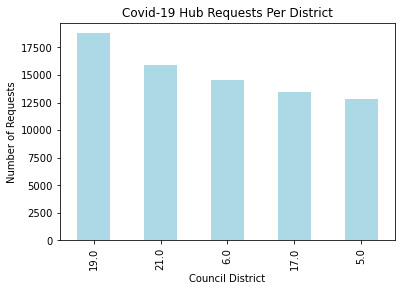

In [13]:
nashhub['Council District'].value_counts()[:5].plot(kind='bar',color='lightblue')
plt.ylabel('Number of Requests')
plt.xlabel('Council District')
plt.title('Covid-19 Hub Requests Per District');

,Request #,Status,Request Type,Subrequest Type,Additional Subrequest Type,Date / Time Opened,Date / Time Closed,Request Origin,System of Origin ID,Contact Type,...,State Issue,Parent Request,Closed When Created,Address,City,Council District,ZIP,Latitude,Longitude,Mapped Location
0,113016,Closed,"Trash, Recycling & Litter",Cart Service,Trash - Request an Additional Cart,2018-10-30 13:47:00,2019-03-05 21:35:00,Phone,NaN,NaN,...,False,NaN,False,2009 Upland Dr,NASHVILLE,7.0,37216,36.198638,-86.706659,"(36.1986378, -86.7066586)"
1,126185,Closed,"Streets, Roads & Sidewalks",Blocking the Right of Way,NaN,2018-12-28 13:04:00,2018-12-28 13:04:00,Phone,OE-00040610_12/27/2018 15:44,NaN,...,False,NaN,True,ELM HILL PKE / DONELSON PKE,NASHVILLE,15.0,37214,36.148809,-86.666282,"(36.14880891, -86.6662816)"
2,119344,Closed,"Trash, Recycling & Litter",Damage to Property,Trash Service,2018-11-27 14:20:00,2018-11-29 04:04:00,Phone,NaN,NaN,...,False,NaN,True,"597 Westchester Dr, Nashville, TN 37115, Unite...",MADISON,8.0,37115,36.263020,-86.738630,"(36.26302, -86.73863)"
3,127752,Closed,"Trash, Recycling & Litter",New Service/Activate Service,New Construction Residential Recycle,2019-01-03 18:57:00,2019-01-09 10:09:00,Phone,NaN,NaN,...,False,NaN,False,Ruffian Way,NaN,NaN,NaN,38.097609,-84.554097,"(38.0976091, -84.5540971)"
4,113477,Closed,"Trash, Recycling & Litter",Backdoor Trash or Recycle Waivers,Request Recycling Disability Waiver,2018-10-31 12:20:00,2018-10-31 16:10:00,Phone,NaN,NaN,...,False,NaN,True,"2326 Smith Springs Rd, Nashville, TN 37217, Un...",NASHVILLE,29.0,37217,36.096460,-86.637440,"(36.09646, -86.63744)"
